In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing
%matplotlib inline
sns.set_theme()
pd.pandas.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv('Ready for Model.csv')

In [3]:
x = df.drop('real_price', axis=1)
y = df[['real_price']]

In [4]:
x.head()

,floor_area_sqm,remaining_lease,school_dist,num_school_2km,hawker_dist,num_hawker_2km,mrt_dist,num_mrt_2km,supermarket_dist,num_supermarket_2km,dist_central,flat_type,storey_range,region_Central,region_East,region_North East,region_West,model_Apartment,model_Maisonette,model_Model A,model_New Generation,model_Premium Apartment,model_Special
0,0.547795,-0.328771,-0.742161,-0.406249,0.832325,-0.698658,1.284210,-0.804472,-0.007237,-1.440940,1.522085,2,0,0,0,0,1,0,0,1,0,0,0
1,0.299695,-0.408958,-0.899067,-0.406249,0.870029,-0.698658,1.445462,-0.967035,0.312519,-1.651818,1.537030,2,0,0,0,0,1,0,0,1,0,0,0
2,-0.403255,1.274970,0.520532,-0.580485,-1.014618,0.335072,0.342933,-0.641909,0.453359,0.246083,0.693861,2,0,0,0,0,1,0,0,1,0,0,0
3,0.547795,0.633473,0.177566,0.464935,-0.490539,-0.440226,0.991577,-0.641909,1.021262,-0.597428,1.128352,3,0,0,0,0,1,0,0,0,0,0,0
4,1.581544,-0.729707,0.859686,-0.406249,-0.726750,0.335072,0.810652,-0.804472,-0.840226,-1.230062,0.774064,3,0,0,0,0,1,0,0,1,0,0,0


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=3)

In [6]:
#double check the input data/ target variable size information. 
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(51355, 23) (51355, 1)
(12839, 23) (12839, 1)


In [7]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, oob_score=True)
## fit the model 
rf.fit(X_train,y_train.values.ravel())

RandomForestRegressor(oob_score=True)

### Model Score

In [15]:
##Model score

scoreOfModel = rf.oob_score_
print('Out of Bag R2 score is: ', scoreOfModel)

Out of Bag R2 score is:  0.9653458773533898


In [16]:

from sklearn.metrics import mean_absolute_error, r2_score

pred = rf.predict(X_test)

print('Test score: ', r2_score(y_test, pred))
print('MSE: ', mean_absolute_error(y_test['real_price'], pred))

Test score:  0.9662947408339121
MSE:  0.045109175590261355


### Feature Importances

In [56]:
rf.feature_importances_

array([5.36310320e-01, 7.17529318e-02, 7.32488317e-03, 7.90486831e-03,
       3.01075669e-02, 5.44313182e-03, 1.97480459e-02, 5.88520641e-03,
       6.45345519e-03, 7.08522784e-03, 1.02516938e-01, 2.02660643e-02,
       2.06535743e-02, 1.45453903e-01, 2.30014540e-03, 8.96628200e-04,
       2.27899675e-03, 1.14003394e-04, 1.96019158e-04, 1.22667233e-03,
       1.82146669e-03, 1.17021304e-03, 3.08973745e-03])

In [57]:
coefs = pd.DataFrame( {'Features': list(x.columns),
    'Coefficient': list(rf.feature_importances_)}
)
coefs.sort_values(by='Coefficient', ascending = False, inplace =True)

<AxesSubplot:xlabel='Coefficient', ylabel='Features'>

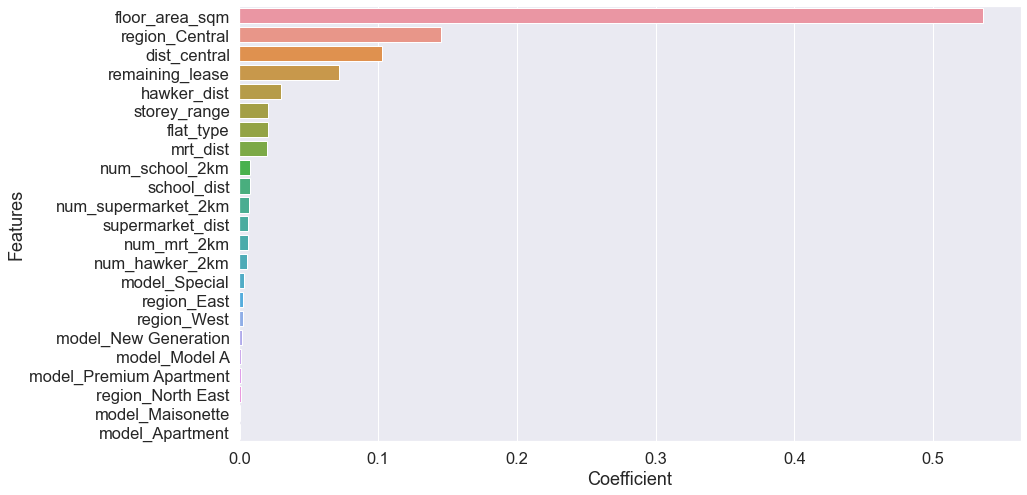

In [71]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(14,8))
sns.barplot(y='Features', x='Coefficient', data=coefs)

**Floor area square meter**  is overwhelmingly the strongest predictor, followed by **central region** in 2nd place, then **distance to central** in 3rd. **Remaining lease** is still strong in 4th place.

### Rerun model with Price per SF 